# Introducción al Caos

Exploremos la función no lineal.


In [3]:
# Importamos paquetes
import nbtools as nb
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import nbtools as nb

Llamamos a la función logistica no lineal de la siguiente manera

$$ x_{n+1} = ax_n(1-x_n) $$

Escribimos una función que nos permita obtener el valor de $x_{n+1}$.

In [4]:
def logistic(a, x):
    return a*x*(1-x)

donde $x_n$ es el valor actual, $x_n + 1$ es el siguiente valor y $a$ es un escalar que gobierna el comportamiento de el sistema. Una analogía/aplicación relativamente simple de la ecuación logística es el crecimiento / decaimiento de una población de animales. En este caso, $x_n$ sería la población actual, $x_n + 1$ son los próximos la población en proximos años, y es responsable de controlar la tasa de natalidad / muerte de los animales en un año determinado basado en la población actual. Lo primero que debe notar es que esta ecuación es increíblemente simple, sin embargo, bajo ciertas condiciones, codifica un comportamiento caótico infinitamente complejo, y el comportamiento del sistema se rige por la elección de $a$.



### Caso 1
Veamos qué sucede si usamos diferentes valores de $a$. Por ejemplo, elijamos un valor de $a \leq3$. Elijamos una suposición inicial de iteraciones ``x_0 = 0.1`` y ``n=1000``.

In [3]:
a = 0.01
x = 0.01
n = 1000
for i in range(n):
    x = logistic(a, x)
print('x: ', x)

x:  0.0


¿Convergió al valor esperado?

In [8]:
# Elijamos un valor a <= 3
if a >= 3:
    print('Expected: ', (a-1)/a)
else:
    print('Expected: ', 0)

Expected:  0.717434303475558


### Caso 2
Si no fue así, puede acercarse a $(a-1)/a$ utilizando una estimación inicial más apropiada o aumentando el número de iteraciones.

Ahora, aumentemos el valor de $ a $ para que esté en el rango $ 3 < a \leq 1 + \sqrt{6} $. Esta vez, ejecute la función logística usando dos valores de ``n``, ``n=1000`` y ``n=1001``.


In [10]:
a = 3.2 # Elijamos un valor de a
x = 0.01
n = 1000
for i in range(n):# repite 1000 logistic
    x = logistic(a, x)
print('x: ', x)

x:  0.5130445095326298


In [14]:
a = 3.2# Elijamos el mismo valor de a previo 
x = 0.01
n = 1001# cambiemos el paso
for i in range(n):
    x = logistic(a, x)
print('x: ', x)

x:  0.7994554904673701


Ahora aumente el valor de ``n``. ¿Son diferentes los resultados? Repita este paso para cuatro valores grandes de ``n`` cuando
$ 1 + \sqrt{6} <a \leq 3.54 \ldots $
 

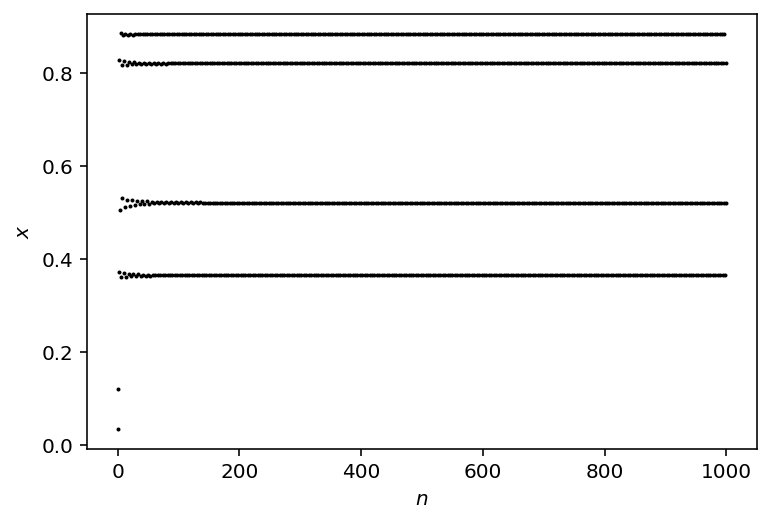

In [7]:
plt.figure(0)
plt.xlabel('$n$')
plt.ylabel('$x$')
a = 3.539
x = 0.01
n = 1001
for i in range(n):
    x = logistic(a, x)
    plt.plot(i, x, 'ok', markersize=1)

## Determinemos aquí las cuatro posibles soluciones

Aumentar aún más el valor de $ a $ hará que nuestros cálculos sean difíciles de visualizar uno por uno. Ejecute la siguiente celda para visualizar una gráfica de convergencia para $ \leq 3.54 \ldots <a \leq 3.57 \ldots $.

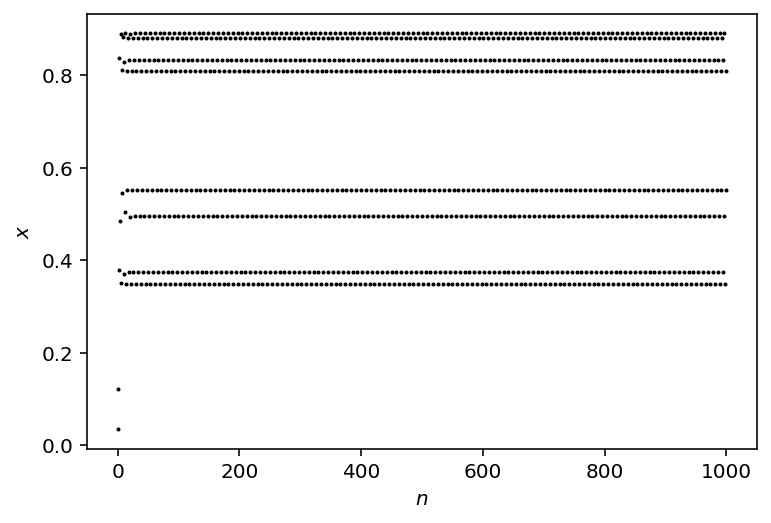

In [6]:
plt.figure(0)
plt.xlabel('$n$')
plt.ylabel('$x$')
a = 3.56
x = 0.01
n = 1001
for i in range(n):
    x = logistic(a, x)
    plt.plot(i, x, 'ok', markersize=1)

¿Qué pasa si aumentamos el valor de $a$ a 3,58?

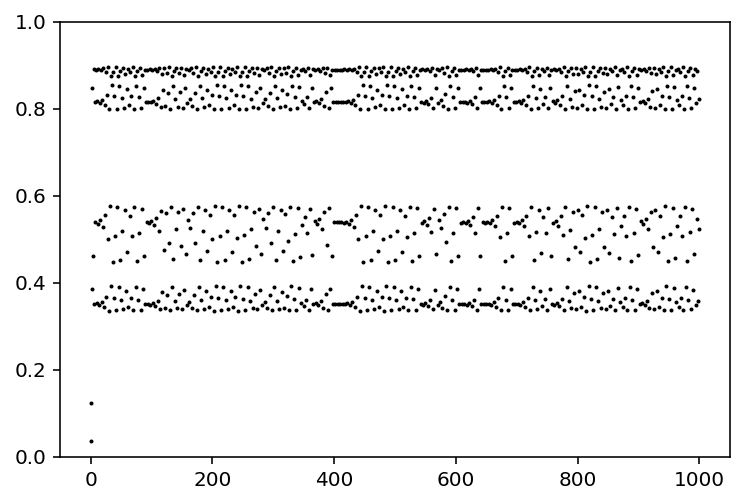

In [9]:
plt.figure(1)
plt.ylim(0, 1)

a = 3.581
x = 0.01
n = 1001

for i in range(n):
    x = logistic(a, x)
    plt.plot(i, x, 'ok', markersize=1)

Actualicemos el gráfico anterior usando un valor ligeramente diferente de $ a> 3.57 \ldots $.

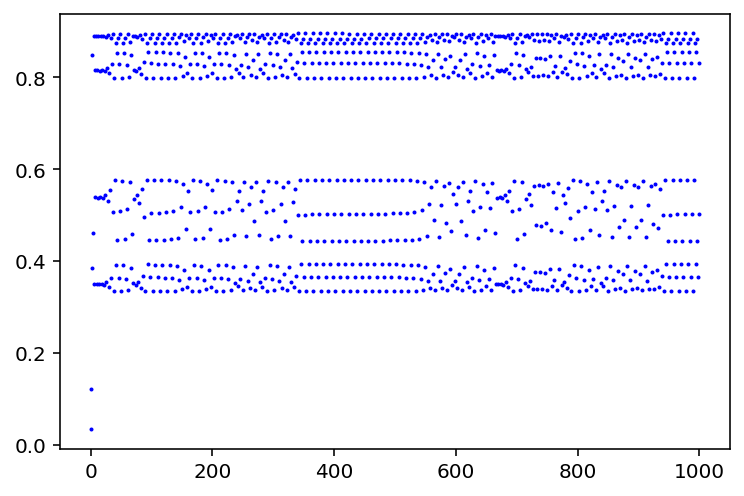

In [17]:
plt.figure(1)

a = 3.582 #Cambiemos ligeramente el valor de a
x = 0.01
n = 1001

for i in range(n):
    x = logistic(a, x)
    plt.plot(i, x, 'ob', markersize=1)

¿Qué tan diferentes son los resultados?
Podemos visualizar todos los posibles valores convergentes de $x$ trazando un mapa logístico. Ejecutemos la siguiente celda para obtener la figura.

Text(0, 0.5, '$x$')

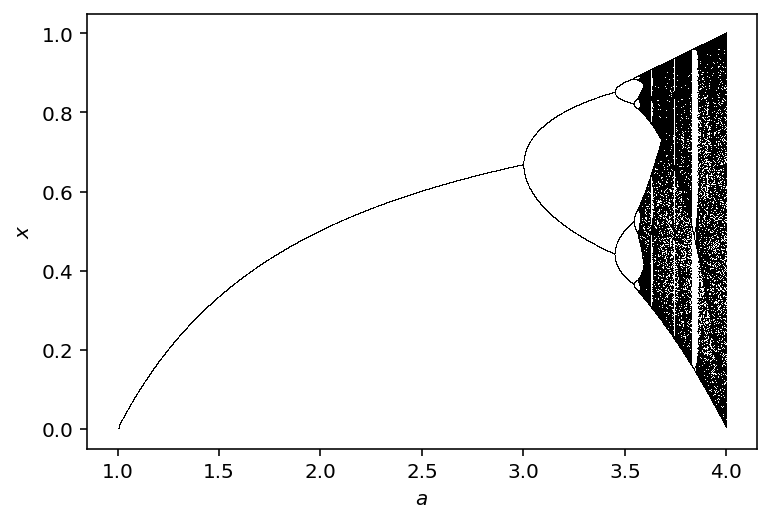

In [18]:
plt.figure(2)

# Definimos muchos valores de a simultáneamente
na = 10000
a = np.linspace(1, 4.0, na)

# Definamos una condición inicial para cada valor de a
x = 1e-5 * np.ones(na)

n = 1000
# Ejecutemos y grafiquemos x para valores grandes de n (soluciones convergentes)
for i in range(n):
    x = logistic(a, x)
    if i > 950:
        plt.plot(a, x, ',k')

plt.xlabel('$a$')
plt.ylabel('$x$')